# G2M Insight for Cab Investment Firm 

<b>The Client</b>

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<br/>

<b>Project delivery:</b>

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

<br/>

<b>Data Set:</b>

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

<b>Cab_Data.csv</b> – this file includes details of transaction for 2 cab companies

<b>Customer_ID.csv</b> – this is a mapping table that contains a unique identifier which links the customer’s demographic details

<b>Transaction_ID.csv</b> – this is a mapping table that contains transaction to customer mapping and payment mode

<b>City.csv</b> – this file contains list of US cities, their population and number of cab users

<br/>

<b>You should fully investigate and understand each data set.</b>

• Review the Source Documentation √

• Understand the field names and data types √

• Identify relationships across the files √

• Field/feature transformations √

• Determine which files should be joined versus which ones should be appended √

• Create master data and explain the relationship √

• Identify and remove duplicates √

• Perform other analysis like NA value and outlier detection √

In [1]:
#Imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
#collect data 

cab = pd.read_csv("./Data/Cab_Data.csv")
customer = pd.read_csv("./Data/Customer_ID.csv")
transaction = pd.read_csv("./Data/Transaction_ID.csv")
city = pd.read_csv("./Data/City.csv")

### First 5 Rows

In [3]:
#top 5 
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab["Transaction ID"].unique()

array([10000011, 10000012, 10000013, ..., 10440105, 10440106, 10440107])

The cab dataset (Cab_Data.csv) has a column for transaction ID, date of travel, company, city, KM Traveled, price charged, and cost of trip.

In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer["Customer ID"].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761])

The customer dataset (Customer_ID.csv) has columns for customer ID, gender, age, and monthly income in USD of the customer.

In [7]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transaction.Payment_Mode.unique()

array(['Card', 'Cash'], dtype=object)

In [9]:
transaction["Transaction ID"].unique()

array([10000011, 10000012, 10000013, ..., 10440106, 10440107, 10440108])

In [10]:
transaction["Customer ID"].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761])

The transaction dataset (Transaction_ID.csv) has a column for the transaction ID, customer ID, and payment mode -whether the customer paid in cash or card. 

The cab datset and the transaction dataset can be joined based on the column Transaction ID.

The customer and transaction dataset can be joined based on the customer id column.

None of the datasets should be appended.

In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [12]:
city[city.City=="SILICON VALLEY"]

,City,Population,Users
4,SILICON VALLEY,"1,177,609","27,247"


The city dataset (City.csv) has the city name and state. I already can see that there's a city with just the city, and might need to be removed later. It also has the overall population of that city and the users in the city. 

### Data Summary

In [13]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### Check for Duplicates 

In [17]:
cab.duplicated().sum()

0

In [18]:
customer.duplicated().sum()

0

In [19]:
transaction.duplicated().sum()

0

In [20]:
city.duplicated().sum()

0

None of the datasets have duplicates.

### Check for Null Values

In [21]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [22]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [23]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [24]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no null values in the datasets.

## Create master data and explain the relationship

The cab datset and the transaction dataset can be joined based on the column Transaction ID.

The customer and transaction dataset can be joined based on the customer id column.

<b>View cab, transaction, and customer dataframes.</b> 

In [25]:
cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [26]:
transaction.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [27]:
customer.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


<b>Merge cab and transaction datset</b>

In [28]:
# merge cab and transaction dataset
df1 = pd.merge(cab, transaction)
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


<b>Merge df1 and customer dataset</b>

In [29]:
# now merge df1 and customer datset
newdf = pd.merge(df1, customer)
newdf.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


<b>Merge city dataset with newdf</b>

In [30]:
masterData = pd.merge(newdf, city)
masterData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


<b>Check for null and duplicate values again</b>

In [31]:
masterData.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [32]:
masterData.duplicated().sum()

0

In [33]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


There are 0 duplicate and null values. The new datset has <b>12</b> columns and <b>359,392</b> rows of entries.

## <b>Check for outliers</b>

In [34]:
color = "#b73779"

<AxesSubplot:xlabel='KM Travelled'>

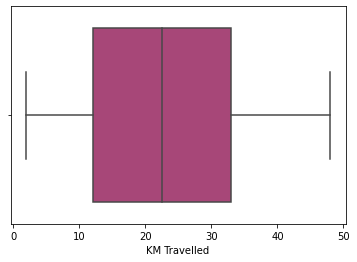

In [35]:
sns.boxplot(x = masterData["KM Travelled"], color=color)

<AxesSubplot:xlabel='Cost of Trip'>

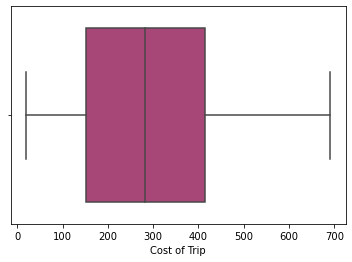

In [36]:
sns.boxplot(x=masterData["Cost of Trip"], color=color)

<AxesSubplot:xlabel='Age'>

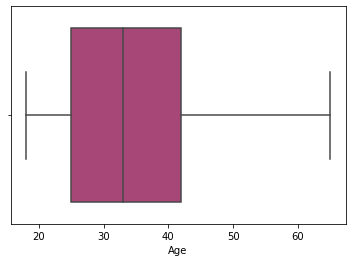

In [37]:
sns.boxplot(x=masterData["Age"], color=color)

<AxesSubplot:xlabel='Income (USD/Month)'>

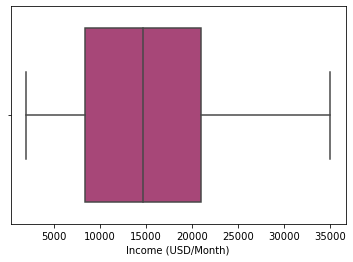

In [38]:
sns.boxplot(x=masterData["Income (USD/Month)"], color=color)

<AxesSubplot:xlabel='Price Charged'>

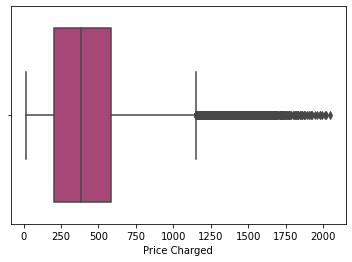

In [39]:
sns.boxplot(x=masterData["Price Charged"], color=color)

The only column that has outliers is the "Price Charged" column. I want to see if there's a correlation between price charged and income.

In [40]:
masterData["Price Charged"].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64

<b>Filter the rows that have a price charged less than $1,100</b>

In [41]:
masterData = masterData[masterData["Price Charged"] < 1100]
masterData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [42]:
#check the new describe stats
masterData["Price Charged"].describe()

count    351411.000000
mean        404.676999
std         246.434923
min          15.600000
25%         202.660000
50%         378.320000
75%         568.100000
max        1099.980000
Name: Price Charged, dtype: float64

<AxesSubplot:xlabel='Price Charged'>

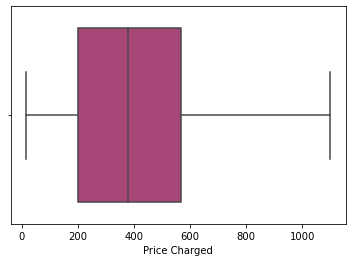

In [43]:
sns.boxplot(x=masterData["Price Charged"], color=color)

## Field/Feature Transformations

#### Date of Travel column.

In [44]:
masterData["Date of Travel"] = masterData["Date of Travel"].apply(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(x)-2))                                              

In [45]:
masterData.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"


In [46]:
print(masterData["Date of Travel"].min())
print(masterData["Date of Travel"].max())

2016-01-02 00:00:00
2018-12-31 00:00:00


### Population

In [47]:
masterData["Population"] = masterData["Population"].apply(lambda x: int(x.replace(',','')))

### Users

In [48]:
masterData["Users"] = masterData["Users"].apply(lambda x: int(x.replace(',','')))

In [49]:
masterData.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701


In [50]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351411 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      351411 non-null  int64         
 1   Date of Travel      351411 non-null  datetime64[ns]
 2   Company             351411 non-null  object        
 3   City                351411 non-null  object        
 4   KM Travelled        351411 non-null  float64       
 5   Price Charged       351411 non-null  float64       
 6   Cost of Trip        351411 non-null  float64       
 7   Customer ID         351411 non-null  int64         
 8   Payment_Mode        351411 non-null  object        
 9   Gender              351411 non-null  object        
 10  Age                 351411 non-null  int64         
 11  Income (USD/Month)  351411 non-null  int64         
 12  Population          351411 non-null  int64         
 13  Users               351411 no

# Hypothesis 

1. Is there a correlation between "Price Charged" and "Income (USD/Month)"?
2. Which city will have the most customers by rate and raw numbers?
3. Is there a seasonal trend for the date of travel?
4. I think there will be a correlation between "KM Travelled" and "Price Charged".
5. Will customers with a higher "Income (USD/Month)" have a higher "Cost of Trip"?
6. Do customers prefer to pay with a card vs cash?
7. What is the ratio of Male to Female customers.


# EDA
Let's take a look at the data.

## Date of Travel

In [51]:
def getMonth(s):
      return s.month

def getDay(s):
      return s.day

def getYear(s):
      return s.year

def getYearMonth(s):
      return s.to_period('M')

In [52]:
dates = masterData.copy()

dates['year'] = dates['Date of Travel'].apply(lambda x: getYear(x))  
dates['month'] = dates['Date of Travel'].apply(lambda x: getMonth(x))
dates['day'] = dates['Date of Travel'].apply(lambda x: getDay(x))
dates['YearMonth'] = dates['Date of Travel'].apply(lambda x: getYearMonth(x))

In [53]:
dates.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,day,YearMonth
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,8,2016-01
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,21,2018-07
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,23,2018-11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,6,2016-01
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,21,2018-04


# Price Charged vs Cost of Trip

## Monthly Revenue

In [54]:
avgRev= dates[["Price Charged", "Cost of Trip", "Company", "year", "month", "YearMonth"]]
avgRev

,Price Charged,Cost of Trip,Company,year,month,YearMonth
0,370.95,313.6350,Pink Cab,2016,1,2016-01
1,598.70,317.4228,Yellow Cab,2018,7,2018-07
2,792.05,597.4020,Yellow Cab,2018,11,2018-11
3,358.52,334.8540,Pink Cab,2016,1,2016-01
4,721.10,467.1192,Yellow Cab,2018,4,2018-04
...,...,...,...,...,...,...
359387,668.93,525.3120,Yellow Cab,2018,3,2018-03
359388,67.60,44.5536,Yellow Cab,2018,4,2018-04
359389,331.97,337.8240,Yellow Cab,2018,7,2018-07
359390,358.23,364.3200,Yellow Cab,2018,8,2018-08


'for container in ax.containers:\n    ax.bar_label(container)'

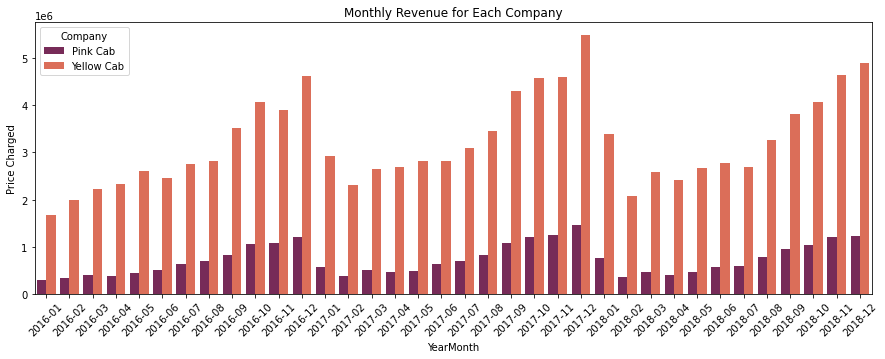

In [55]:
df1 = avgRev.groupby(['YearMonth', 'Company'])['Price Charged'].sum()
df1 = df1.to_frame()
df1.reset_index(inplace=True)

#Plot bar chart

fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.barplot(x='YearMonth', y='Price Charged',hue="Company", data=df1, palette="rocket")

plt.title("Monthly Revenue for Each Company")

"""for container in ax.containers:
    ax.bar_label(container)"""

## Monthly Average

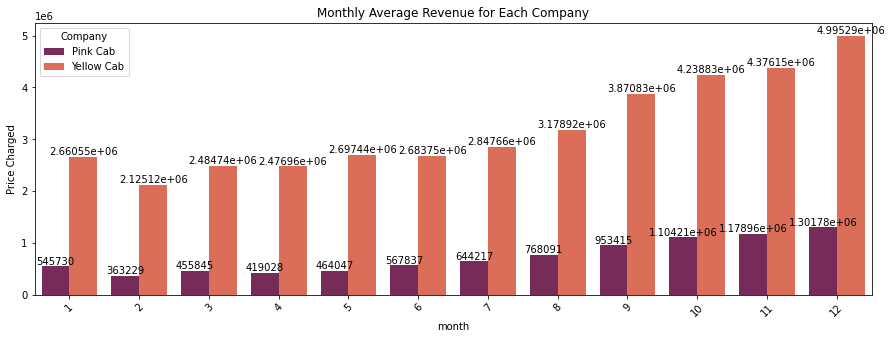

In [56]:
#this is over the course of 3 years, so i divided by 3 for each month
df2 = avgRev.groupby(['month', 'Company'])['Price Charged'].sum()/3
df2 = df2.to_frame()
df2.reset_index(inplace=True)

#Plot bar chart

fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.barplot(x='month', y='Price Charged',hue="Company", data=df2, palette="rocket")

plt.title("Monthly Average Revenue for Each Company")

for container in ax.containers:
    ax.bar_label(container)

## Average Trip Cost

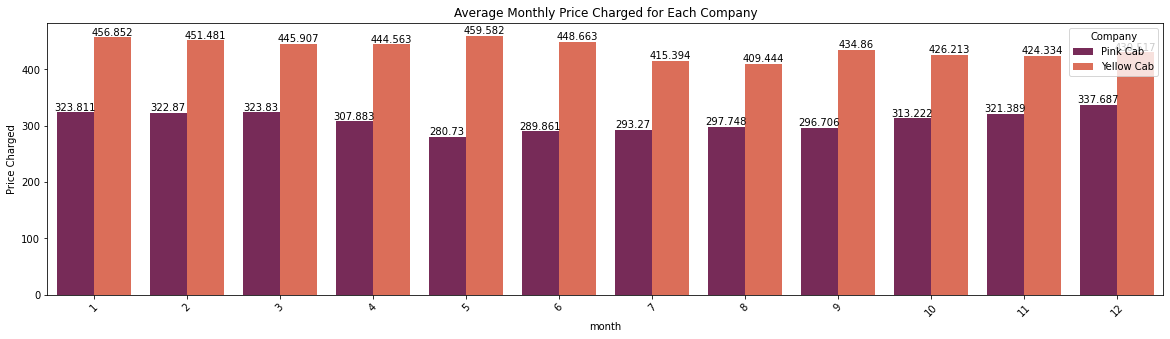

In [57]:
df3 = avgRev.groupby(['month', 'Company'])['Price Charged'].mean()
df3 = df3.to_frame()
df3.reset_index(inplace=True)

#Plot bar chart

fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

sns.barplot(x='month', y='Price Charged',hue="Company", data=df3, palette="rocket")

plt.title("Average Monthly Price Charged for Each Company")

for container in ax.containers:
    ax.bar_label(container)

On average, the Yellow Cab company charges more compared to the Pink Cab. Most of the Yellow Cab price charge is around $450, and July and August seems to be their cheaper months. The yellow cab price charge is around $320, and May and June is their cheaper months. May is the Yellow Cab company peack price charge month.

## Dates Travelled

In [58]:
date = dates[['year', 'month', "day", "YearMonth", "City", "Date of Travel", "Company"]]
date.head()

,year,month,day,YearMonth,City,Date of Travel,Company
0,2016,1,8,2016-01,ATLANTA GA,2016-01-08,Pink Cab
1,2018,7,21,2018-07,ATLANTA GA,2018-07-21,Yellow Cab
2,2018,11,23,2018-11,ATLANTA GA,2018-11-23,Yellow Cab
3,2016,1,6,2016-01,ATLANTA GA,2016-01-06,Pink Cab
4,2018,4,21,2018-04,ATLANTA GA,2018-04-21,Yellow Cab


In [59]:
date = date.sort_values(by='YearMonth', ascending=True)
date["YearMonth"] = date["YearMonth"].dt.strftime('%Y-%m')

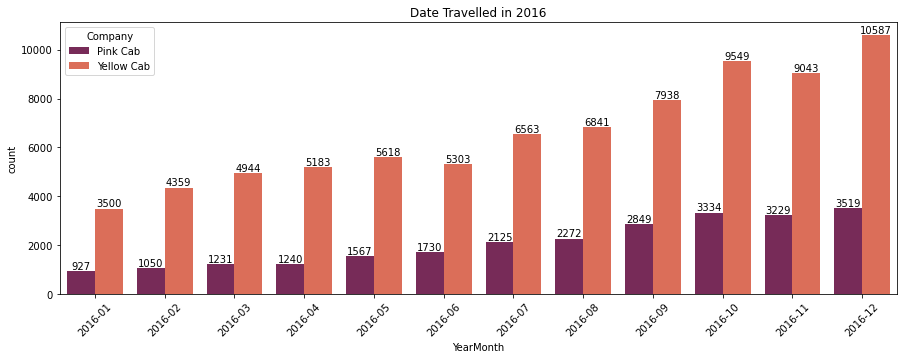

In [60]:
year16 = date[date["year"] == 2016]

fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.countplot(data=year16, x="YearMonth", hue="Company",
              palette="rocket")
plt.title("Date Travelled in 2016")

for container in ax.containers:
    ax.bar_label(container)

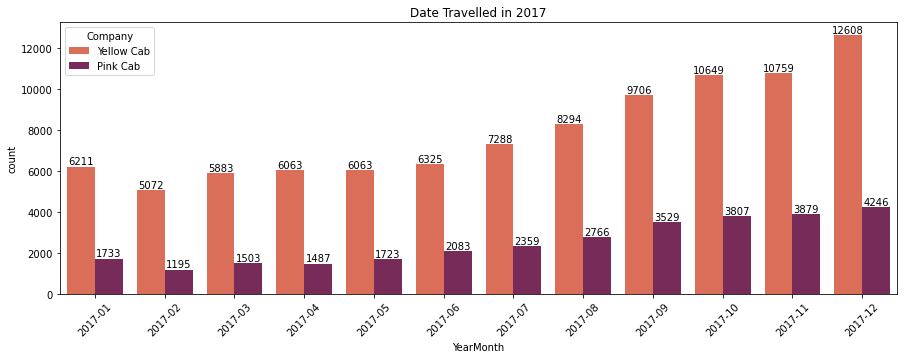

In [82]:
year17 = date[date["year"] == 2017]

fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.countplot(data=year17, x="YearMonth", hue="Company",
              palette="rocket_r")
plt.title("Date Travelled in 2017")

for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Date Travelled in 2018')

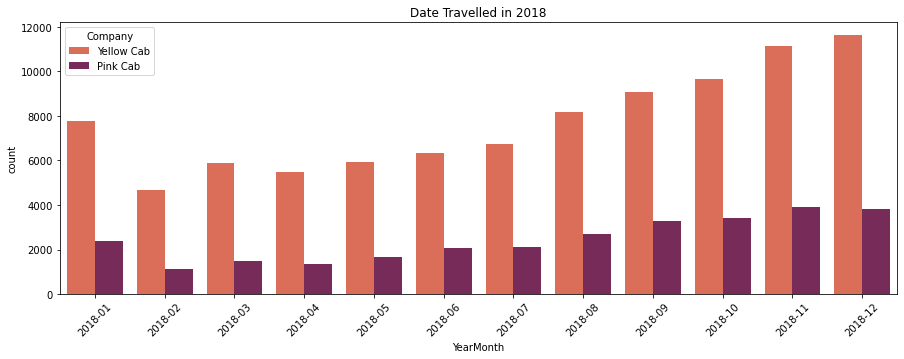

In [83]:
year18 = date[date["year"] == 2018]

fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.countplot(data=year18, x="YearMonth", hue="Company",
              palette="rocket_r")
plt.title("Date Travelled in 2018")


'for container in ax.containers:\n    ax.bar_label(container)'

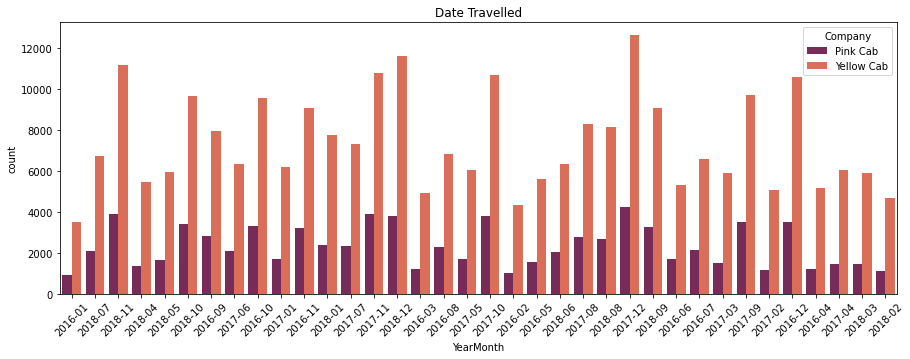

In [63]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.countplot(data=dates, x="YearMonth", hue="Company",
              palette="rocket")
plt.title("Date Travelled")

"""for container in ax.containers:
    ax.bar_label(container)"""

## KM Travelled

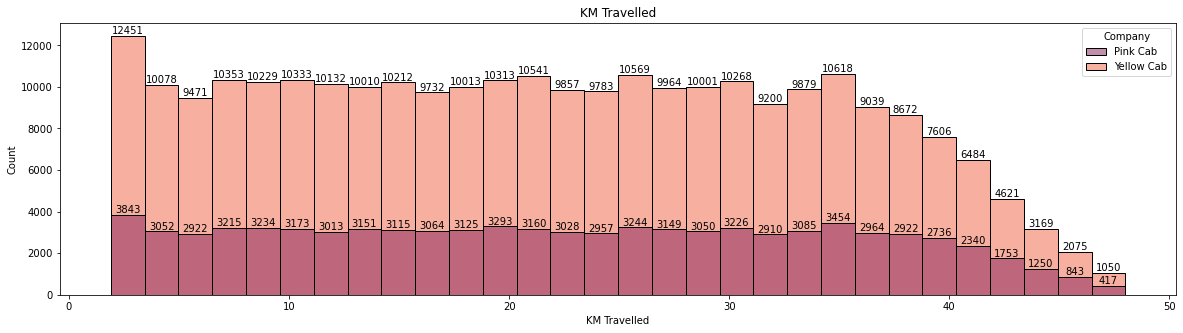

In [64]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data = masterData, x="KM Travelled", hue="Company", palette = "rocket", bins=30)
plt.title("KM Travelled")

for container in ax.containers:
    ax.bar_label(container)

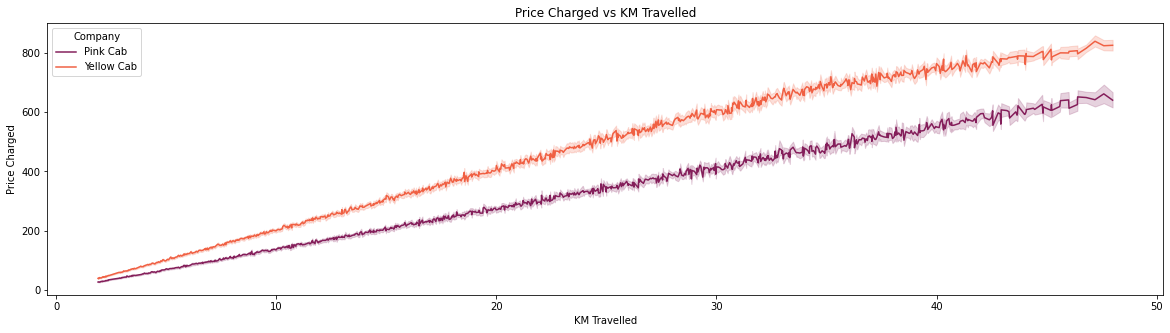

In [65]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data = masterData, y="Price Charged", x="KM Travelled", hue="Company", palette="rocket")

plt.title("Price Charged vs KM Travelled")

for container in ax.containers:
    ax.bar_label(container)

## Price Charged

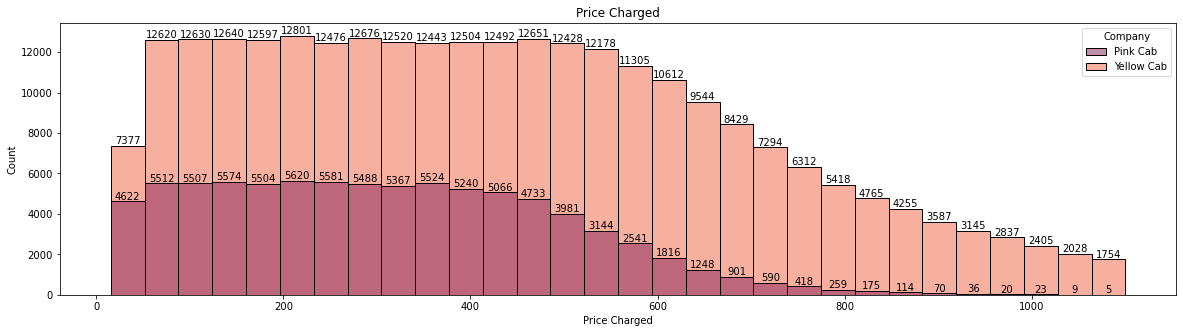

In [66]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data = masterData, x="Price Charged", hue="Company", palette = "rocket", bins=30)

plt.title("Price Charged")

for container in ax.containers:
    ax.bar_label(container)

## Cost of Trip

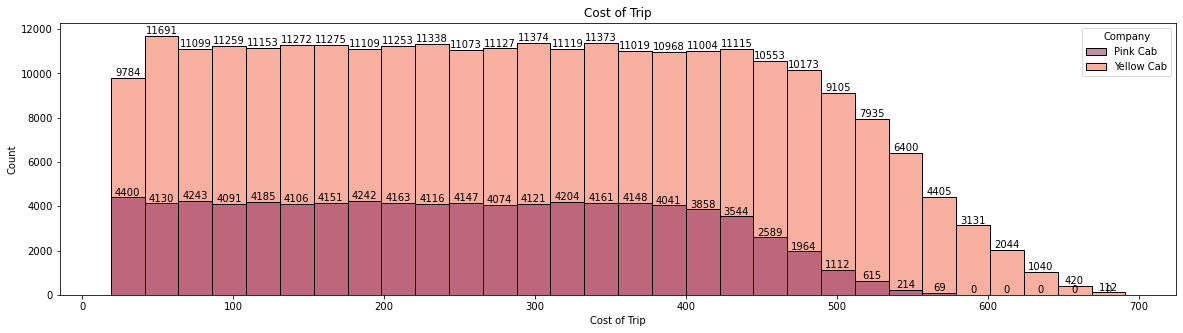

In [67]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=masterData,x="Cost of Trip", hue="Company", palette = "rocket", bins=30)

plt.title("Cost of Trip")

for container in ax.containers:
    ax.bar_label(container)

## Payment Mode

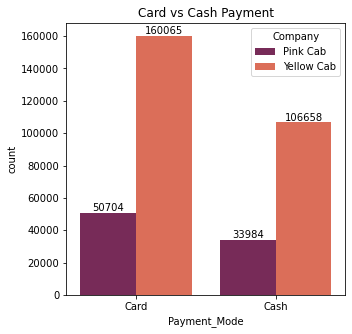

In [84]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=masterData, x="Payment_Mode", hue="Company", palette="rocket")
plt.title("Card vs Cash Payment")

for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Proportion Based on Payment_Mode')

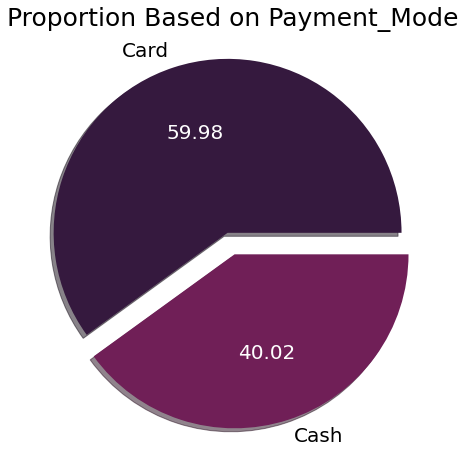

In [69]:
colors= sns.color_palette('rocket')
al = masterData["Payment_Mode"].value_counts()
myexplode = [0.10, 0.03]

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Proportion Based on Payment_Mode", fontsize=25)

## Gender

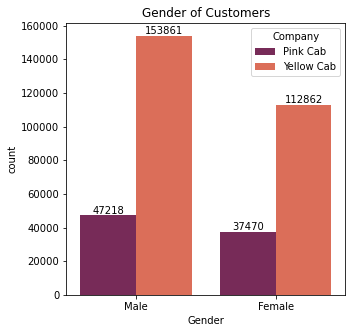

In [87]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=masterData, x="Gender", hue="Company", palette="rocket")

plt.title("Gender of Customers")

for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Proportion Based on Gender')

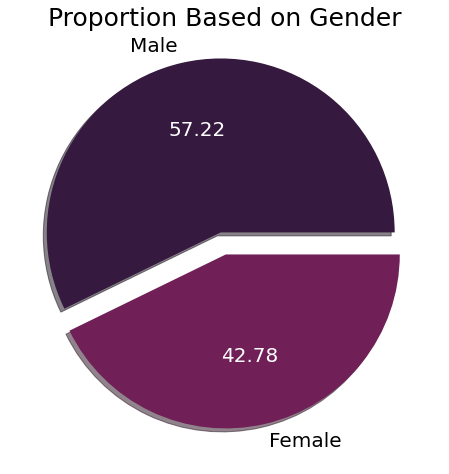

In [71]:
colors= sns.color_palette('rocket')
al = masterData["Gender"].value_counts()
myexplode = [0.10, 0.03]

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Proportion Based on Gender", fontsize=25)

## Age

Text(0.5, 1.0, 'Distribution of Age')

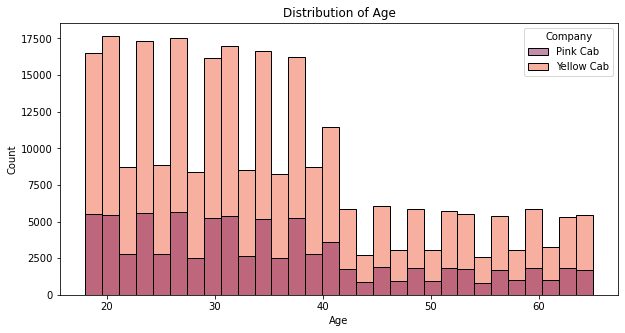

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=masterData, x="Age", palette="rocket", hue="Company", bins=30)
plt.title("Distribution of Age")


## Income 

Text(0.5, 1.0, 'Distribution of Income per month')

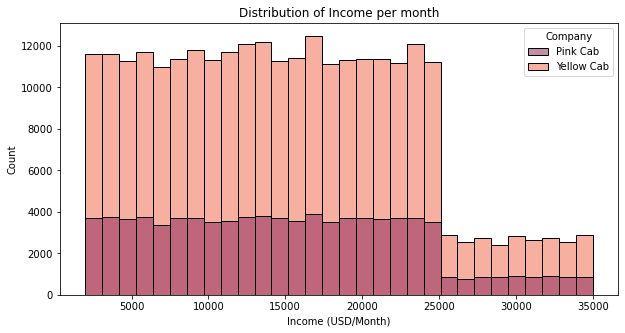

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=masterData, x="Income (USD/Month)", palette="rocket", hue="Company", bins=30)
plt.title("Distribution of Income per month")

In [74]:
masterData["Price Charged"].corr(masterData["Income (USD/Month)"])

0.002075394743229815

In [75]:
masterData["Cost of Trip"].corr(masterData["Income (USD/Month)"])

-0.0013052981955516774

# City

## City Population 

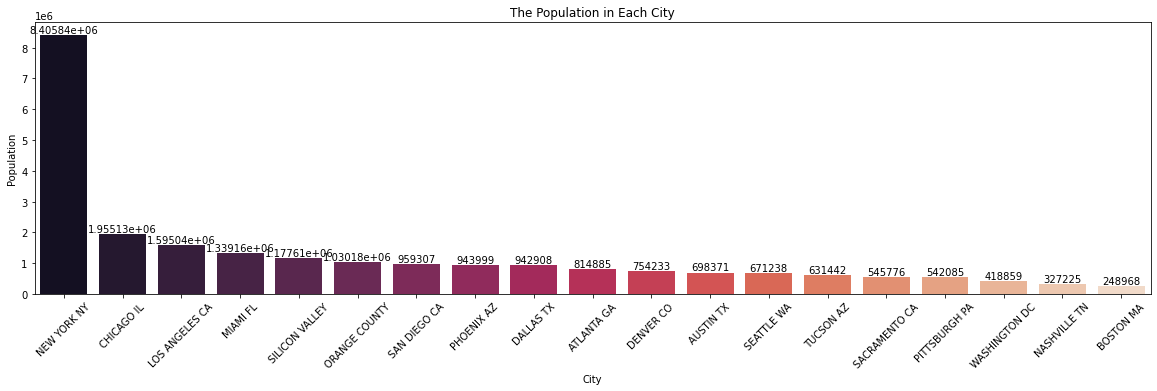

In [76]:
df = masterData[["City","Population"]].sort_values("Population", ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

sns.barplot(data=df, x="City", y="Population", palette="rocket")
plt.title("The Population in Each City")

for container in ax.containers:
    ax.bar_label(container)

## City Users

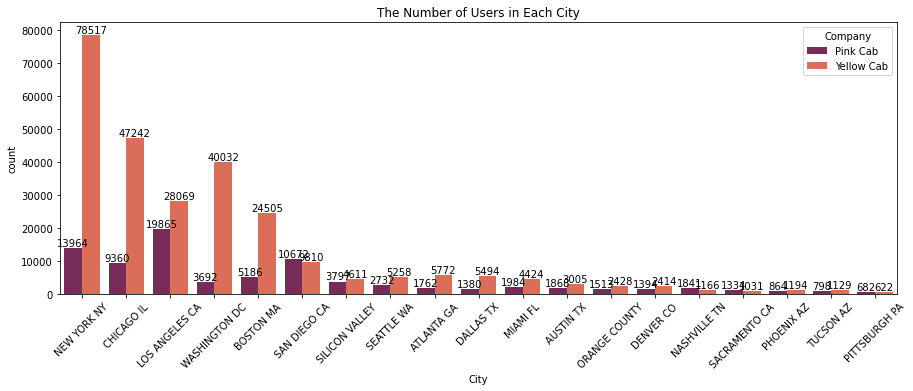

In [77]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.countplot(data=masterData, x="City", palette="rocket", hue="Company", 
              order=df['City'].value_counts().index)

plt.title("The Number of Users in Each City")

for container in ax.containers:
    ax.bar_label(container)

## Company

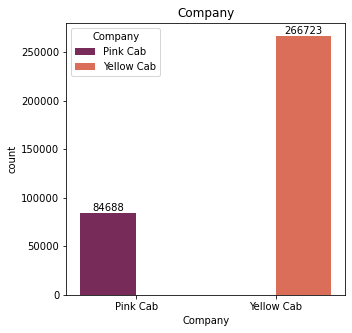

In [78]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=masterData, x="Company", hue="Company", palette="rocket")

plt.title("Company")

for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Proportion Based on Company')

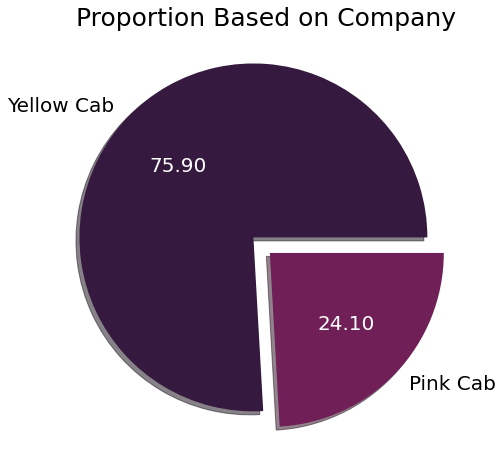

In [79]:
colors= sns.color_palette('rocket')
al = masterData["Company"].value_counts()
myexplode = [0.10, 0.03]

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Proportion Based on Company", fontsize=25)

### User Rate in each city

In [80]:
df = masterData[["City","Users", "Company", "Population"]].sort_values("Users")
df["User Rate"] = df["Users"]/df["Population"]
df["User Rate"] = df["User Rate"].apply(lambda x : x * 100)
df = df.sort_values("User Rate", ascending=False)
df.head()

,City,Users,Company,Population,User Rate
26691,BOSTON MA,80021,Pink Cab,248968,32.141078
23473,BOSTON MA,80021,Yellow Cab,248968,32.141078
23499,BOSTON MA,80021,Yellow Cab,248968,32.141078
23497,BOSTON MA,80021,Yellow Cab,248968,32.141078
23460,BOSTON MA,80021,Yellow Cab,248968,32.141078


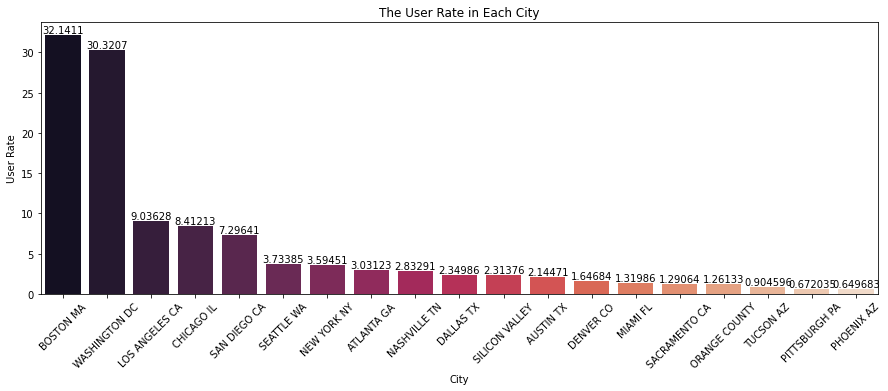

In [81]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

sns.barplot(data=df, x="City", y="User Rate", palette="rocket")
plt.title("The User Rate in Each City")

for container in ax.containers:
    ax.bar_label(container)

# Hypothesis Answered 

<b>1. Is there a correlation between "Price Charged" and "Income (USD/Month)"?</b><br/>
A: No, I used the .corr() function and the result is 0.0021.

<b>2. Which city will have the most customers by rate and raw numbers?</b><br/>
A: Raw number: New York, Rate: Boston, Mas with a rate of 32.1% user rate.

<b>3. Is there a seasonal trend for the date of travel?</b><br/>
A: It's a steady increase from the beginning of the year until the end of the year. November and December are the months with the most customers and significantly drops off at in January.  

<b>4. I think there will be a correlation between "KM Travelled" and "Price Charged".</b><br/>
A: Yes, the more KM travelled, the higher the price charded is. The Yellow Cab charges more than the Pink Cab company.

<b>5. Will customers with a higher "Income (USD/Month)" have a higher "Cost of Trip"?</b><br/>
A: There is no correlation. I used the .corr() function and the result was -0.00131. 

<b>6. Do customers prefer to pay with a card vs cash?</b> <br/>
A: Card, About %60 of customers used cards

<b>7. What is the ratio of Male to Female customers.</b><br/>
A: About 57% of customers are male and about 43% customers are female. In this dataset, there are 201,079 male and 150,332 female customers.

# Additional Findings

• Jan and Feb. are typically the slower months.

• About 76% of customers used The Yellow Cab company.

• The median distribution of monthly income in each city is around 15,000 for each city. Looking at the distributions of monthly income, it significantly drops off at the 25,000 mark.

• Most of the customer ages are slighly under 20 and 40 years old. The median age is between 30 and 40 in each city.

• Most of the cost of the trips are between about 20 and 400. It starts to significantly decrease at the 400 mark. it is the same with the Price Charged column.

• The median KM Travelled is between 20 and 30. 

• On average, the Yellow Cab company charges more compared to the Pink Cab. Most of the Yellow Cab price charge is around 450, and July and August seems to be their cheaper months. The yellow cab price charge is around 320, and May and June is their cheaper months. May is the Yellow Cab company peack price charge month.


# Recommendation

I would invest in the Yellow Cab.

<b>Users:</b> The Yellow Cab company is performing better than the Pink Cab company. It has significantly more customers with about 76% of customers of The Yellow Cab company.

<b>Income:</b> Both groups have similar distributions of monthly income. The Yello Cab just have more customers. 

<b>Price Charged:</b> The Yellow Company has a higher distribution of price charged. Rides that cost $800+ were mainly paid by the Yellow Cab company customers.

<b>Monthly Average Price Charged:</b> The Yellow Company has a higher monthly price charged.